In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Manual Implementation

In [19]:
# Generate sample data with a quadratic relationship
# Ensures reproducibility - every time we run this code, we'll get the same "random" numbers
np.random.seed(42)

# Independent Variable
# Creates 100 evenly spaced values between -3 and 3
X = np.linspace(-3, 3, 100).reshape(-1, 1)


# Dependent Variable 
# Generates 100 random values from a standard normal distribution (mean=0, std=1)
# Multiplying by 0.5 makes the noise smaller (std=0.5)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1) * 0.5


In [21]:
# Creates polynomial features manually 
X_poly = np.column_stack([X, X ** 2])

In [23]:
# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [25]:
# Make predictions 
y_pred = model.predict(X_poly)

In [27]:
print(f"Coefficients: {model.coef_[0]}\n")
print(f"Intercept: {model.intercept_[0]:.3f}\n")
print(f"R^2 Score: {r2_score(y, y_pred):.3f}\n")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}\n")

Coefficients: [1.01149439 0.51018088]

Intercept: 1.917

R^2 Score: 0.962

RMSE: 0.450



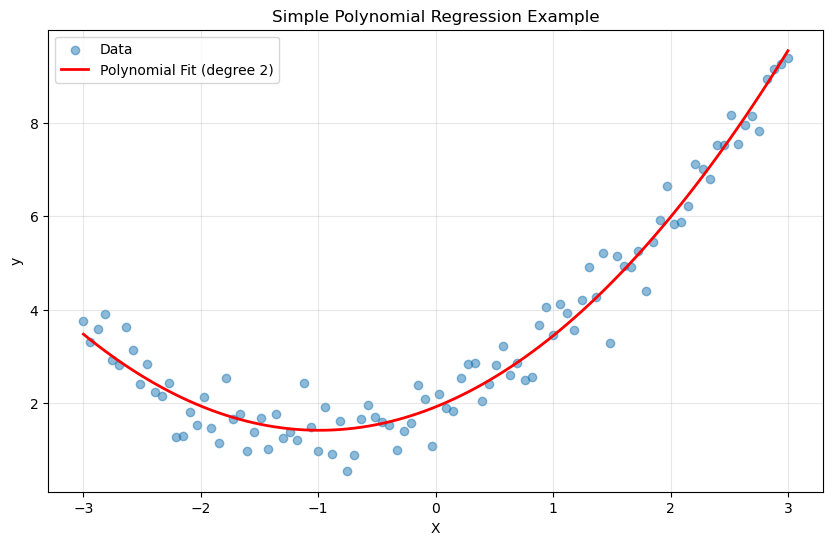

In [30]:
## Visualize 
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha =0.5, label = "Data")
plt.plot(X, y_pred, 'r-', linewidth = 2, label = "Polynomial Fit (degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Polynomial Regression Example")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

- ---------------------------------------------------------------------------------

### Using Sklearn's PolynomialFeatures

In [34]:
X2 = np.linspace(-4, 4, 100).reshape(-1, 1)
y2 = (2 * X2 ** 3) - (3 * X2 **2) + X2 + 5 + np.random.randn(100, 1) * 2  # 2X^3 - 3X^2 + X + 5 + noise

Degree 1:
 Features created: 1
R^2 Score: 0.7900
RMSE: 24.7617

Degree 2:
 Features created: 2
R^2 Score: 0.8648
RMSE: 19.8686

Degree 3:
 Features created: 3
R^2 Score: 0.9988
RMSE: 1.8831

Degree 4:
 Features created: 4
R^2 Score: 0.9988
RMSE: 1.8591

Degree 5:
 Features created: 5
R^2 Score: 0.9988
RMSE: 1.8370



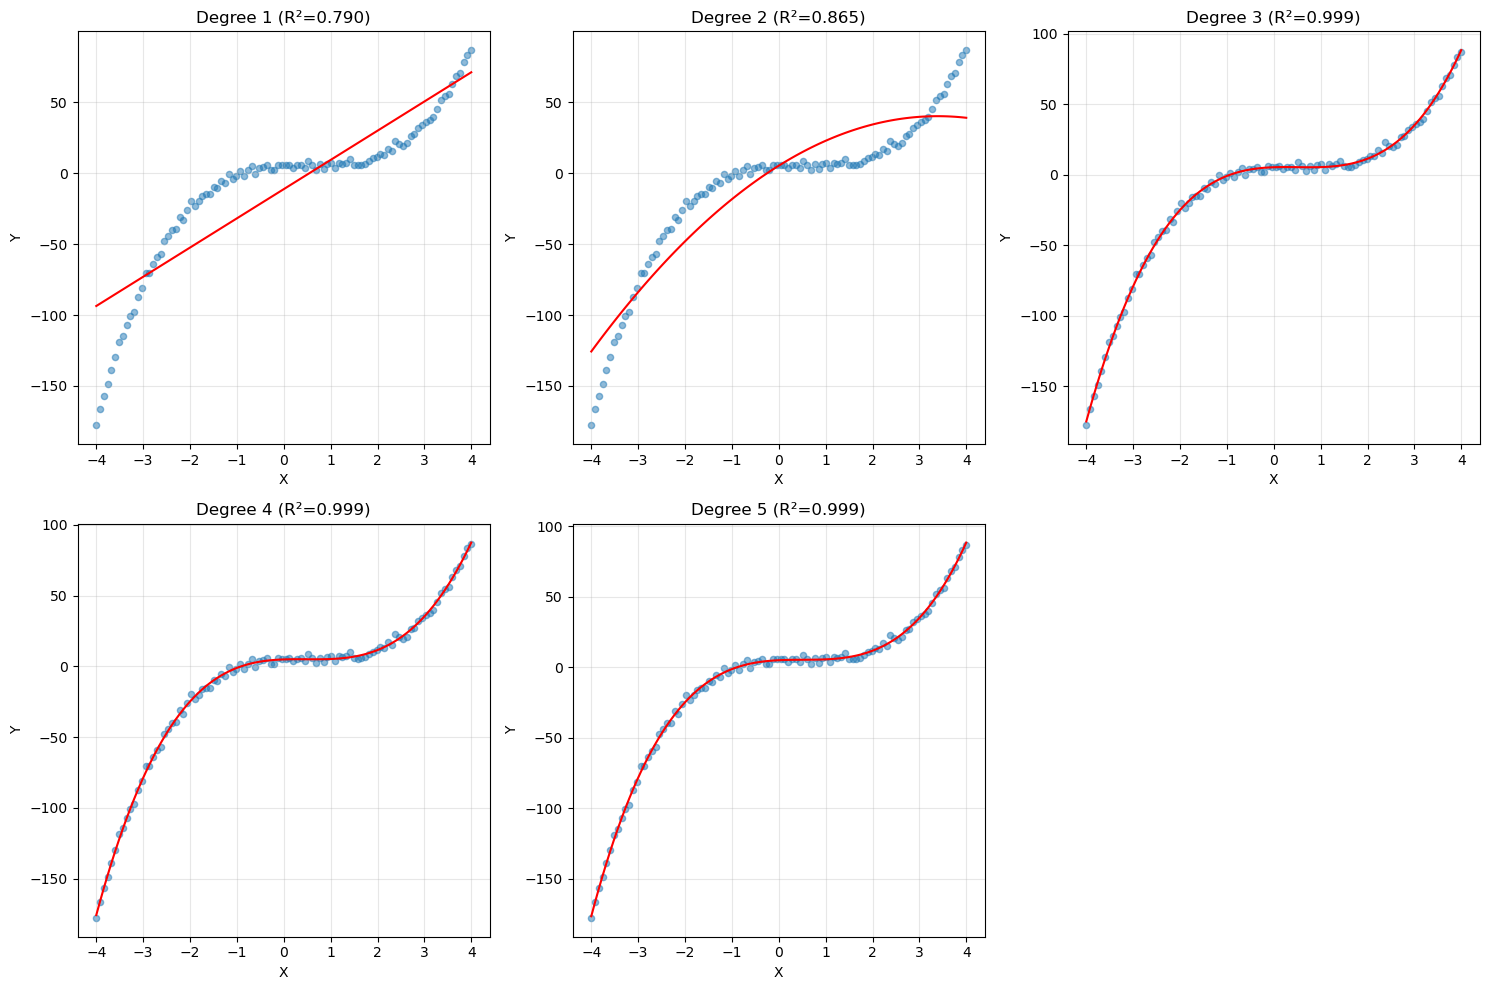

In [40]:
# Try different polynomial degrees
degrees = [1, 2, 3, 4, 5]
plt.figure(figsize = (15, 10))

# Enumerate to start counting from 1 instead of 0
for i, degree in enumerate(degrees, 1):
    # Create polynomial features 
    poly_features = PolynomialFeatures(degree = degree, include_bias = False)
    # Transform the data (X2)
    X2_poly = poly_features.fit_transform(X2)

    # Fit model
    model = LinearRegression()
    model.fit(X2_poly, y2)

    # Predict
    y2_pred = model.predict(X2_poly)

    # Calculate metrics
    r2 = r2_score(y2, y2_pred)
    rmse = np.sqrt(mean_squared_error(y2, y2_pred))

    print(f"Degree {degree}:")
    print(f" Features created: {X2_poly.shape[1]}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}\n")


    # Plot
    plt.subplot(2, 3, i)
    plt.scatter(X2, y2, alpha = 0.5, s = 20)
    plt.plot(X2, y2_pred, "r-")
    plt.title(f"Degree {degree} (R²={r2:.3f})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

- --------------------------------------------------------------------------------

### Train - Test Split and Evaluation

In [135]:
# Generate data

# np.sin(1) to np.sin(10) covers about 1.5 full sine wave cycles
# Shows multiple peaks and valleys
# Demonstrates the oscillating pattern clearly

# One full sine cycle = 2π ≈ 6.28
# Range of 9 (from 1 to 10) covers about 9/6.28 ≈ 1.4 cycles
X3 = np.linspace(1, 10, 200).reshape(-1, 1)



# Simulates real-world noisy data that follows a sinusoidal pattern

# If X3 has shape (200, 1), `.ravel()` converts it to shape (200,)
# This ensures it's compatible with the noise term
# y: Either 1D (n,) or 2D (n, 1) - flexible ✅
y3 = np.sin(X3).ravel() + np.random.randn(200) * 0.1

Degree 1:
Train R²:  0.0063
Test  R²:  -0.0507
Difference: 0.0571

Train RMSE:0.6812
Test RMSE: 0.7775


Degree 3:
Train R²:  0.6267
Test  R²:  0.8084
Difference: 0.1818

Train RMSE:0.4176
Test RMSE: 0.3320


Degree 5:
Train R²:  0.9664
Test  R²:  0.9737
Difference: 0.0073

Train RMSE:0.1252
Test RMSE: 0.1229


Degree 10:
Train R²:  0.9818
Test  R²:  0.9780
Difference: 0.0038

Train RMSE:0.0922
Test RMSE: 0.1126


Degree 15:
Train R²:  0.9819
Test  R²:  0.9770
Difference: 0.0048

Train RMSE:0.0920
Test RMSE: 0.1150




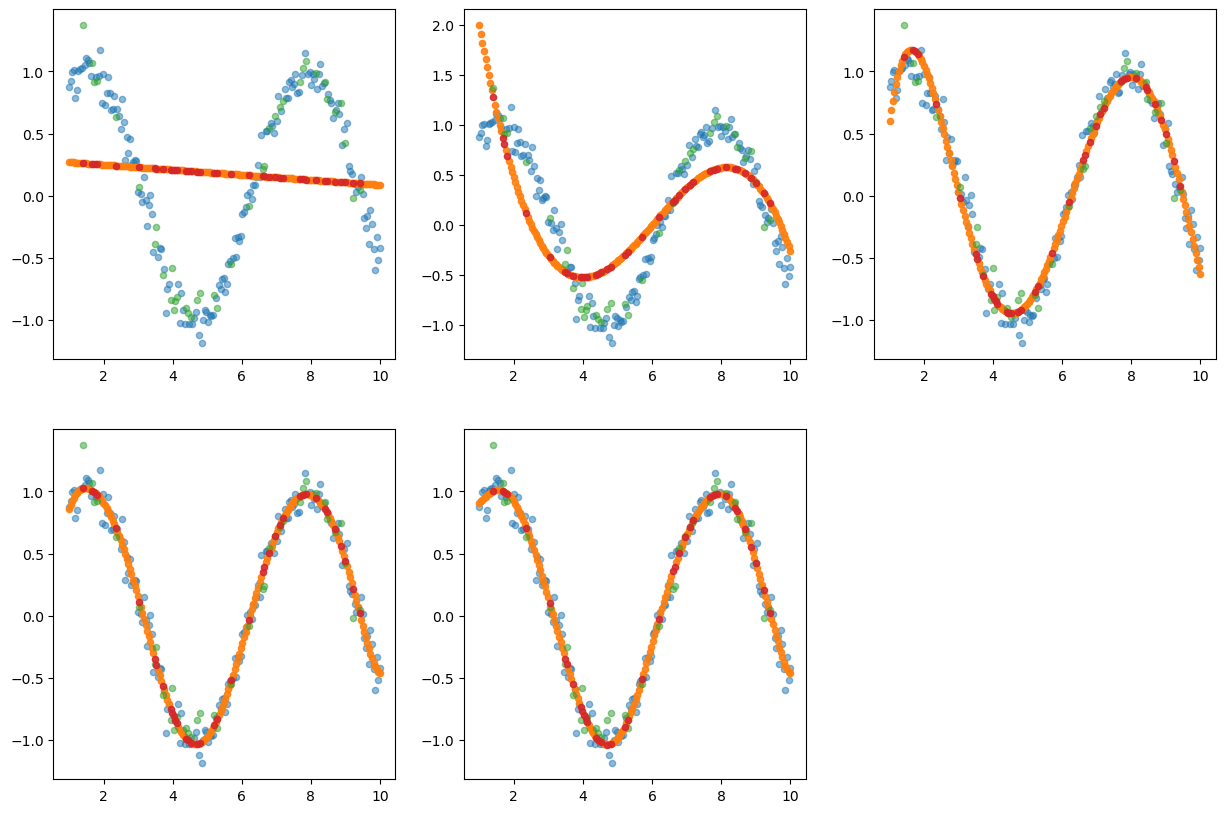

In [215]:
# Split data
X3_train, X3_test, y3_train, y3_test = train_test_split (
    X3, y3, 
    test_size = 0.2, 
    random_state = 42
)

# Test different degrees 

degrees = [1, 3, 5, 10, 15]
train_r2scores = []
train_rmse_values = []
test_r2scores = []
test_rmse_values = []
plt.figure(figsize =(15, 10))

for i, degree in enumerate(degrees, 1):
    poly_features = PolynomialFeatures(degree = degree)
    X3_train_poly = poly_features.fit_transform(X3_train)
    X3_test_poly  = poly_features.fit_transform(X3_test)

    # Fit model
    model = LinearRegression()
    model.fit(X3_train_poly, y3_train)

    # Prediction 
    y3_train_pred = model.predict(X3_train_poly)
    y3_test_pred = model.predict(X3_test_poly)

    # Calculate metrics
    train_r2 = r2_score(y3_train, y3_train_pred)
    test_r2 = r2_score(y3_test, y3_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y3_train, y3_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y3_test, y3_test_pred))
    train_r2scores.append(train_r2)
    train_rmse_values.append(train_rmse)
    test_r2scores.append(test_r2)
    test_rmse_values.append(test_rmse)

    print(f"Degree {degree}:")
    print(f"Train R²:  {train_r2:.4f}")
    print(f"Test  R²:  {test_r2:.4f}")
    print(f"Difference: {abs(train_r2 - test_r2):.4f}\n")
    print(f"Train RMSE:{train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}\n\n")


    # Plot
    plt.subplot(2, 3, i)
    plt.scatter(X3_train, y3_train, alpha = 0.5, s = 20, label = "Train")
    plt.scatter(X3_train, y3_train_pred, alpha = 0.9, s = 20, label = "Train-Pred")

   
    plt.scatter(X3_test, y3_test, alpha = 0.5, s = 20, label = "Test")
    plt.scatter(X3_test, y3_test_pred, alpha = 0.9, s = 20, label = "Test-Pred")

    # Create smooth line for predictions
    X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    #plt.plot(X3_train_poly, y3_train_pred, "r--", linewidth = 2, label = "Predictions")
    

    